In [1]:
import findspark
findspark.init()

import pyspark

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName("DataPreprocessing").getOrCreate()
spark

In [52]:
musicDF = spark.read.option('header', 'true').csv("file:/D:/mxmh_survey_results.csv")

In [53]:
from functools import reduce
from pyspark.sql.functions import col, round, when

# Удаляем ненужный столбец:
musicDF = musicDF.drop("Permissions")
musicDF = musicDF.drop("Timestamp")

# Создадим список новых столбцов:
oldColumns = musicDF.schema.names
newColumns = ["Age", "StrService", "HoursPerDay", "WhileWorking", "Instrumentalist", "Composer", "FavGenre", "Exploratory", "ForeignLanguages", 
              "BPM", "FrequencyClassical", "FrequencyCountry", "FrequencyEDM", "FrequencyFolk", "FrequencyGospel", "FrequencyHipHop", "FrequencyJazz", 
              "FrequencyKpop", "FrequencyLatin", "FrequencyLofi", "FrequencyMetal", "FrequencyPop", "FrequencyR&B", "FrequencyRap", "FrequencyRock",
              "FrequencyVideoGameMusic", "Anxiety", "Depression", "Insomnia", "OCD", "MusicEffects"] 

# Замена столбцов:
musicDF = reduce(lambda data, idx: data.withColumnRenamed(oldColumns[idx], newColumns[idx]), range(len(oldColumns)), musicDF)


# Список для обновления типов данных в столбцах:
columns_and_types = [
    ("Age", "integer"),
    ("HoursPerDay", "double"),
    ("BPM", "integer"),
    ("Anxiety", "integer"),
    ("Depression", "integer"),
    ("Insomnia", "integer"),
    ("OCD", "integer")
]

# Обновление типов данных в столбцах
for column, data_type in columns_and_types:
    musicDF = musicDF.withColumn(column, col(column).cast(data_type))

# Очищение памяти
del column
del data_type
del oldColumns
del columns_and_types

musicDF.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- StrService: string (nullable = true)
 |-- HoursPerDay: double (nullable = true)
 |-- WhileWorking: string (nullable = true)
 |-- Instrumentalist: string (nullable = true)
 |-- Composer: string (nullable = true)
 |-- FavGenre: string (nullable = true)
 |-- Exploratory: string (nullable = true)
 |-- ForeignLanguages: string (nullable = true)
 |-- BPM: integer (nullable = true)
 |-- FrequencyClassical: string (nullable = true)
 |-- FrequencyCountry: string (nullable = true)
 |-- FrequencyEDM: string (nullable = true)
 |-- FrequencyFolk: string (nullable = true)
 |-- FrequencyGospel: string (nullable = true)
 |-- FrequencyHipHop: string (nullable = true)
 |-- FrequencyJazz: string (nullable = true)
 |-- FrequencyKpop: string (nullable = true)
 |-- FrequencyLatin: string (nullable = true)
 |-- FrequencyLofi: string (nullable = true)
 |-- FrequencyMetal: string (nullable = true)
 |-- FrequencyPop: string (nullable = true)
 |-- FrequencyR&B: strin

In [54]:
# Подсчёт количества строк для отслеживания количества потерянных данных
musicDF.count()

736

In [55]:
# Вывод уникальных значений:
for column in newColumns:
    print(f"--------------------------------------\n Столбец {column}: {musicDF.toPandas()[column].unique()}")
del column

--------------------------------------
 Столбец Age: [18. 63. 61. 21. 19. nan 17. 16. 15. 14. 20. 26. 23. 37. 36. 24. 22. 42.
 25. 32. 29. 41. 31. 33. 30. 43. 28. 34. 13. 35. 27. 53. 49. 60. 38. 44.
 40. 64. 56. 59. 10. 12. 54. 57. 69. 72. 73. 39. 58. 67. 70. 55. 48. 71.
 74. 51. 65. 80. 50. 68. 46. 89.]
--------------------------------------
 Столбец StrService: ['Spotify' 'Pandora' 'YouTube Music' 'I do not use a streaming service.'
 'Apple Music' 'Other streaming service' None]
--------------------------------------
 Столбец HoursPerDay: [ 3.    1.5   4.    2.5   5.    1.    6.    8.    2.   12.   24.    0.5
  0.25  0.    7.   10.    9.    0.7   4.5  20.   16.   15.   14.   13.
  0.1  11.   18.  ]
--------------------------------------
 Столбец WhileWorking: ['Yes' 'No' None]
--------------------------------------
 Столбец Instrumentalist: ['Yes' 'No' None]
--------------------------------------
 Столбец Composer: ['Yes' 'No' None]
--------------------------------------
 Столбец Fav

In [56]:
# Создание временного представления:
musicDF.createOrReplaceTempView("music")

In [57]:
spark.sql("""   SELECT BPM
                FROM music
                ORDER BY BPM ASC""").show()

+----+
| BPM|
+----+
|NULL|
|NULL|
|NULL|
|NULL|
|NULL|
|NULL|
|NULL|
|NULL|
|NULL|
|NULL|
|NULL|
|NULL|
|NULL|
|NULL|
|NULL|
|NULL|
|NULL|
|NULL|
|NULL|
|NULL|
+----+
only showing top 20 rows



In [60]:
# берем столбец Exploratory так как в нем отсутствуют нулевые значения
spark.sql("""   SELECT COUNT(Exploratory)
                FROM music
                WHERE BPM IS NULL""").show()

+------------------+
|count(Exploratory)|
+------------------+
|               107|
+------------------+



In [61]:
spark.sql("""   SELECT BPM
                FROM music
                ORDER BY BPM DESC""").show()

+---------+
|      BPM|
+---------+
|999999999|
|      624|
|      220|
|      220|
|      218|
|      210|
|      210|
|      208|
|      204|
|      200|
|      200|
|      200|
|      200|
|      200|
|      200|
|      200|
|      194|
|      194|
|      193|
|      192|
+---------+
only showing top 20 rows



In [62]:
spark.sql("""   SELECT Age
                FROM music
                ORDER BY Age DESC""").show()

+---+
|Age|
+---+
| 89|
| 80|
| 74|
| 73|
| 72|
| 71|
| 70|
| 69|
| 68|
| 67|
| 67|
| 67|
| 65|
| 64|
| 64|
| 64|
| 63|
| 63|
| 63|
| 61|
+---+
only showing top 20 rows



In [63]:
spark.sql("""   SELECT Age
                FROM music
                ORDER BY Age ASC""").show()

+----+
| Age|
+----+
|NULL|
|  10|
|  12|
|  12|
|  12|
|  13|
|  13|
|  13|
|  13|
|  13|
|  13|
|  13|
|  13|
|  14|
|  14|
|  14|
|  14|
|  14|
|  14|
|  14|
+----+
only showing top 20 rows



In [64]:
spark.sql("""   SELECT HoursPerDay
                FROM music
                ORDER BY HoursPerDay ASC""").show()

+-----------+
|HoursPerDay|
+-----------+
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.1|
|       0.25|
|       0.25|
|       0.25|
|        0.5|
|        0.5|
|        0.5|
|        0.5|
|        0.5|
|        0.5|
|        0.5|
|        0.5|
|        0.5|
|        0.5|
+-----------+
only showing top 20 rows



In [65]:
spark.sql("""   SELECT HoursPerDay
                FROM music
                ORDER BY HoursPerDay DESC""").show()

+-----------+
|HoursPerDay|
+-----------+
|       24.0|
|       24.0|
|       24.0|
|       20.0|
|       18.0|
|       16.0|
|       15.0|
|       15.0|
|       14.0|
|       13.0|
|       12.0|
|       12.0|
|       12.0|
|       12.0|
|       12.0|
|       12.0|
|       12.0|
|       12.0|
|       12.0|
|       11.0|
+-----------+
only showing top 20 rows



In [66]:
spark.sql("""   SELECT StrService
                FROM music
                WHERE StrService IS NULL""").show()

+----------+
|StrService|
+----------+
|      NULL|
+----------+



In [67]:
spark.sql("""   SELECT MusicEffects
                FROM music
                WHERE MusicEffects IS NULL""").show()

+------------+
|MusicEffects|
+------------+
|        NULL|
|        NULL|
|        NULL|
|        NULL|
|        NULL|
|        NULL|
|        NULL|
|        NULL|
+------------+



In [68]:
spark.sql("""   SELECT WhileWorking
                FROM music
                WHERE WhileWorking IS NULL""").show()

+------------+
|WhileWorking|
+------------+
|        NULL|
|        NULL|
|        NULL|
+------------+



In [69]:
spark.sql("""   SELECT Instrumentalist
                FROM music
                WHERE Instrumentalist IS NULL""").show()

+---------------+
|Instrumentalist|
+---------------+
|           NULL|
|           NULL|
|           NULL|
|           NULL|
+---------------+



In [70]:
spark.sql("""   SELECT ForeignLanguages
                FROM music
                WHERE ForeignLanguages IS NULL""").show()

+----------------+
|ForeignLanguages|
+----------------+
|            NULL|
|            NULL|
|            NULL|
|            NULL|
+----------------+



In [71]:
import matplotlib.pyplot as plt

<Axes: xlabel='HoursPerDay', ylabel='Age'>

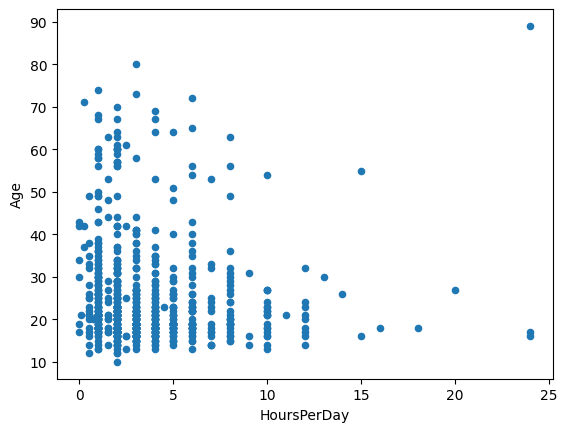

In [72]:
musicDF.toPandas().plot.scatter (x = 'HoursPerDay', y = 'Age')

In [73]:
# Отсечения выбросов (без BPM, так как пропадут нулевые значения):
musicDF=musicDF.filter(musicDF.Age<=70)
musicDF=musicDF.filter(musicDF.Age>=13)
musicDF=musicDF.filter(musicDF.HoursPerDay<=12.0)
musicDF=musicDF.filter(musicDF.HoursPerDay>0.0)

<Axes: xlabel='HoursPerDay', ylabel='Age'>

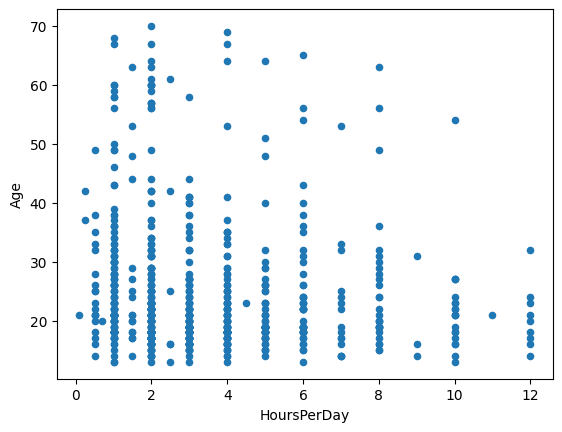

In [74]:
musicDF.toPandas().plot.scatter (x = 'HoursPerDay', y = 'Age')

In [75]:
musicDF = musicDF.na.replace(999999999, None)
musicDF = musicDF.na.replace(624, None)

In [76]:
musicDF.createOrReplaceTempView("music")

In [77]:
musicDF = spark.sql("""SELECT *,
       CASE
           WHEN (BPM IS NULL) OR (BPM = 624) OR (BPM = 999999999) THEN ROUND(AVG(BPM) OVER (PARTITION BY FavGenre))
           ELSE BPM
       END AS BPM_filled
FROM music""")

In [78]:
musicDF = musicDF.drop("BPM")

In [79]:
musicDF = musicDF.withColumnRenamed("BPM_filled", "BPM")

<Axes: xlabel='BPM', ylabel='Age'>

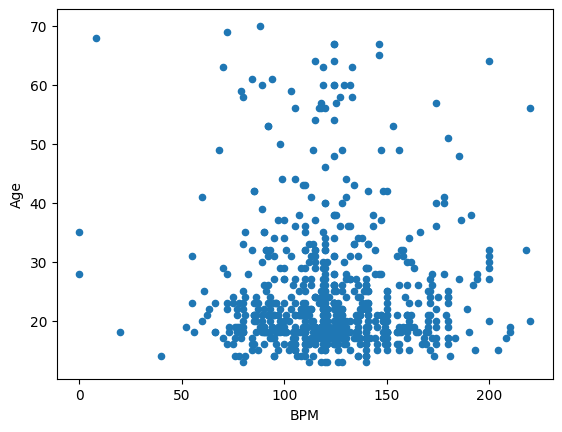

In [80]:
musicDF.toPandas().plot.scatter (x = 'BPM', y = 'Age')

In [81]:
# Отсечения выбросов:
musicDF=musicDF.filter(musicDF.BPM<=220)
musicDF=musicDF.filter(musicDF.BPM>=50)

<Axes: xlabel='BPM', ylabel='Age'>

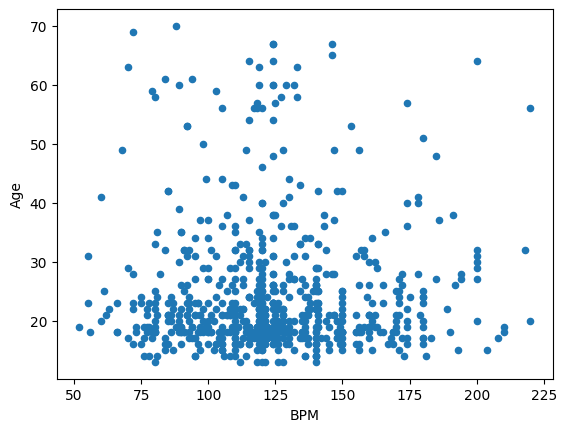

In [82]:
musicDF.toPandas().plot.scatter (x = 'BPM', y = 'Age')

In [83]:
musicDF = musicDF.dropna(subset = "StrService")
musicDF = musicDF.dropna(subset = "ForeignLanguages")
musicDF = musicDF.dropna(subset = "Instrumentalist")
musicDF = musicDF.dropna(subset = "WhileWorking")
musicDF = musicDF.dropna(subset = "MusicEffects")

In [84]:
musicDF.createOrReplaceTempView("music")

In [85]:
spark.sql("""   SELECT BPM
                FROM music
                ORDER BY BPM ASC""").show()

+----+
| BPM|
+----+
|52.0|
|55.0|
|55.0|
|56.0|
|60.0|
|60.0|
|61.0|
|62.0|
|63.0|
|66.0|
|66.0|
|66.0|
|68.0|
|70.0|
|70.0|
|70.0|
|72.0|
|72.0|
|72.0|
|72.0|
+----+
only showing top 20 rows



In [86]:
spark.sql("""   SELECT BPM
                FROM music
                ORDER BY BPM DESC""").show()

+-----+
|  BPM|
+-----+
|220.0|
|220.0|
|218.0|
|210.0|
|210.0|
|208.0|
|204.0|
|200.0|
|200.0|
|200.0|
|200.0|
|200.0|
|200.0|
|200.0|
|194.0|
|194.0|
|193.0|
|192.0|
|191.0|
|190.0|
+-----+
only showing top 20 rows



In [87]:
spark.sql("""   SELECT Age
                FROM music
                ORDER BY Age ASC""").show()

+---+
|Age|
+---+
| 13|
| 13|
| 13|
| 13|
| 13|
| 13|
| 13|
| 14|
| 14|
| 14|
| 14|
| 14|
| 14|
| 14|
| 14|
| 14|
| 14|
| 14|
| 14|
| 14|
+---+
only showing top 20 rows



In [88]:
# Русификация данных:
musicDF = musicDF.na.replace('Sometimes', "Иногда")
musicDF = musicDF.na.replace('Very frequently', "Очень часто")
musicDF = musicDF.na.replace('Rarely', "Редко")
musicDF = musicDF.na.replace('Never', "Никогда")
musicDF = musicDF.na.replace('Yes', "Да")
musicDF = musicDF.na.replace('No', "Нет")
musicDF = musicDF.na.replace('I do not use a streaming service.', "Не пользуюсь")
musicDF = musicDF.na.replace('Other streaming service', "Другое")
musicDF = musicDF.na.replace('No effect', "Нет эффекта")
musicDF = musicDF.na.replace('Improve', "Улучшение")
musicDF = musicDF.na.replace('Worsen', "Ухудшение")

In [89]:
# Проверка изменений:
for column in newColumns:
    print(f"--------------------------------------\n Столбец {column}: {musicDF.toPandas()[column].unique()}")
del column

--------------------------------------
 Столбец Age: [19 16 17 36 24 25 31 23 29 32 54 14 13 15 69 22 20 58 49 64 34 21 42 18
 30 35 70 43 26 28 44 27 37 60 57 39 61 56 33 41 40 38 48 53 59 65 63 67
 51 50 46]
--------------------------------------
 Столбец StrService: ['Spotify' 'Apple Music' 'Не пользуюсь' 'YouTube Music' 'Pandora' 'Другое']
--------------------------------------
 Столбец HoursPerDay: [ 2.    1.    3.    4.    0.5   6.    5.    8.    1.5   0.25  7.   10.
  2.5   0.1  12.   11.    9.    0.7   4.5 ]
--------------------------------------
 Столбец WhileWorking: ['Да' 'Нет']
--------------------------------------
 Столбец Instrumentalist: ['Нет' 'Да']
--------------------------------------
 Столбец Composer: ['Нет' 'Да']
--------------------------------------
 Столбец FavGenre: ['Classical' 'Country' 'EDM' 'Folk' 'Gospel' 'Hip hop' 'Jazz' 'K pop'
 'Latin' 'Lofi' 'Metal' 'Pop' 'R&B' 'Rap' 'Rock' 'Video game music']
--------------------------------------
 Столбец Explorato

In [90]:
# Подсчёт количества строк для отслеживания количества потерянных данных
musicDF.count()

690

In [94]:
#Расскоментировать если необходимо установить файл:
path = 'D:\musicData\Base_Table'
musicDF.toPandas().to_csv(path)

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\david\AppData\Local\Temp\ipykernel_10496\2289050839.py:2: SyntaxWarning: invalid escape sequence '\M'
  path = 'D:\MusicData\Base_Table'


In [92]:
AvgFavGengre = spark.sql("""SELECT DISTINCT ROUND(AVG(BPM) OVER (PARTITION BY FavGenre)) as AvarageBPM, FavGenre
                            FROM music            """)

In [93]:
AvgFavGengre.show()

+----------+----------------+
|AvarageBPM|        FavGenre|
+----------+----------------+
|     116.0|       Classical|
|     111.0|         Country|
|     137.0|             EDM|
|     114.0|            Folk|
|     110.0|          Gospel|
|     113.0|         Hip hop|
|     126.0|            Jazz|
|     129.0|           K pop|
|     123.0|           Latin|
|     114.0|            Lofi|
|     143.0|           Metal|
|     119.0|             Pop|
|     118.0|             R&B|
|     128.0|             Rap|
|     124.0|            Rock|
|     121.0|Video game music|
+----------+----------------+



In [68]:
# Проверка правильности выполнения запроса:
# spark.sql("""SELECT DISTINCT ROUND(AVG(BPM)) as AvarageBPM, FavGenre
#                             FROM music
#                             WHERE FavGenre = 'Rap'
#                             GROUP BY FavGenre""").show()

In [50]:
#Расскоментировать если необходимо установить файл:
path = 'D:\musicData\AvarageFavGenre_Table'
AvgFavGengre.toPandas().to_csv(path)

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\david\AppData\Local\Temp\ipykernel_10496\1908724735.py:2: SyntaxWarning: invalid escape sequence '\m'
  path = 'D:\musicData\AvarageFavGenre_Table'
